# Ridge

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 5; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0

#Regressors
np.random.seed(0)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)
print("Check correlation:", np.corrcoef(x2,x3)[0,1])

#Error term
epsilon = np.random.normal(0,1,n)

#Centering the regressors necessary for ridge regression 
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x3 = x3 - np.mean(x3)

#Data Generating Process (True Model)
y = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon

#Correctly specified
x=np.column_stack((x1,x2,x3))
xcon = sm.add_constant(x)        
model = sm.OLS(y,xcon) 
results = model.fit()
print(results.summary2())

xs = np.column_stack((np.ones(n),x1,x2,x3))
betaOLS = np.dot(np.linalg.inv(np.dot(xs.T,xs)),np.dot(xs.T,y))
print("OLS Estimates               : ", betaOLS)

lam = 50
xs = np.column_stack((x1,x2,x3))
betaRidge = np.dot(np.linalg.inv(np.dot(xs.T,xs)+lam*np.identity(np.shape(xs)[1])),np.dot(xs.T,y))
print("Own Ridge Estimates         : ", np.append(np.mean(y),betaRidge))

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
lr = LinearRegression()
lr.fit(xs,y)
rr = Ridge(alpha=lam, fit_intercept=True, solver='sparse_cg')
# rr = Ridge(alpha=lam, fit_intercept=True, solver='sparse_cg', tol=0.00000001)
rr.fit(xs, y)
print("Ridge Estimates from package: ",np.append(rr.intercept_,rr.coef_))

Check correlation: 0.00656204011451738
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.974     
Dependent Variable: y                AIC:                28556.6874
Date:               2022-05-17 11:46 BIC:                28585.5288
No. Observations:   10000            Log-Likelihood:     -14274.   
Df Model:           3                F-statistic:        1.230e+05 
Df Residuals:       9996             Prob (F-statistic): 0.00      
R-squared:          0.974            Scale:              1.0175    
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const     4.9980      0.0101    495.4721    0.0000    4.9782    5.0178
x1        3.0015      0.0102    293.8430    0.0000    2.9815    3.0216
x2        5.0176      0.0102    493.9339    0.0000    4.9977    5.0375
x3       

# Lasso

In [ ]:
from sklearn.linear_model import Lasso
lam = 2.3

lr = LinearRegression()
lr.fit(xs,y)
rr = Lasso(alpha=lam, fit_intercept=True)
rr.fit(xs,y)
print("Lasso Estimates from package:", np.append(rr.intercept_,rr.coef_))

Lasso Estimates from package: [4.99799408 0.62934538 2.6802179  0.        ]


# Logit Marginal Effects

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.585    
Dependent Variable: y                AIC:                5729.3824
Date:               2022-05-26 09:08 BIC:                5758.2238
No. Observations:   10000            Log-Likelihood:     -2860.7  
Df Model:           3                F-statistic:        4697.    
Df Residuals:       9996             Prob (F-statistic): 0.00     
R-squared:          0.585            Scale:              0.10379  
---------------------------------------------------------------------
         Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const    0.4988      0.0032    154.7999    0.0000    0.4925    0.5052
x1       0.1830      0.0033     56.0812    0.0000    0.1766    0.1894
x2       0.3183      0.0032     98.1058    0.0000    0.3119    0.3247
x3       0.1186      0.0032     36.7124    0.0000    0.1123   

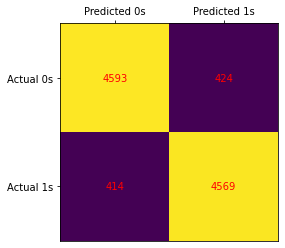

Fraction of correct predictions:  0.9162


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 0; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0

#Regressors
np.random.seed(0)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)

#Error term
epsilon = np.random.logistic(0,1,n)

#Data Generating Process (True Model)
ystar = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon
y = 1*(ystar > 0)

#Correctly specified
x=np.column_stack((x1,x2,x3))
xcon = sm.add_constant(x)        
model = sm.OLS(y,xcon) 
results = model.fit()
print(results.summary2())

datalogit = pd.DataFrame(np.column_stack((y,x1,x2,x3)))
formula = ('y ~ x1 + x2 + x3')
model = logit(formula = formula, data = datalogit).fit()
print(model.summary())


AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())

#cm = model.pred_table(0.8)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='newton-cg', C=9999999, fit_intercept=True)
model.fit(x, y)

prob = model.predict_proba(x)

pred = model.predict(x)

pred = 1*(prob[:,1] > 0.5)


cm = confusion_matrix(y, pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)



# Logit Classification

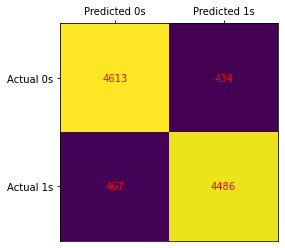

Fraction of correct predictions:  0.9099


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 0; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0

#Regressors
np.random.seed(1000)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)

#Error term
epsilon = np.random.logistic(0,1,n)

#Data Generating Process (True Model)
ystar = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon
y = 1*(ystar > 0)
x=np.column_stack((x1,x2,x3))  

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='newton-cg', C=9999999, fit_intercept=True)
model.fit(x,y)

prob = model.predict_proba(x)
pred = model.predict(x)
pred = 1*(prob[:,1] > 0.5)
cm = confusion_matrix(y, pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)



# Cross Validation

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 5; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0.8

#Regressors
np.random.seed(0)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)

#Error term
epsilon = np.random.normal(0,1,n)

#Centering the regressors necessary for ridge regression 
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x3 = x3 - np.mean(x3)

#Data Generating Process (True Model)
y = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon

#Split the data 70/30 into training and test sample
#!!!!!! WE CAN ONLY USE THE FIRST 7000 and last 3000 BECAUSE WE ARE SIMULATING RANOM NUMBERS
#!!!!!! USING MONTE CARLO. IF WE HAD DATA WE MUST SELECT THE NUMBERS RANDOMLY AND NOT IN A ROW!!!!!
ntrain = int(0.7*n)
x1train = x1[0:ntrain]
x2train = x2[0:ntrain]
x3train = x3[0:ntrain]
ytrain = y[0:ntrain]

x1test = x1[ntrain:n]
x2test = x2[ntrain:n]
x3test = x3[ntrain:n]
ytest = y[ntrain:n]

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
xtrain = np.column_stack((x1train,x2train,x3train))
lambdas = np.arange(0.01, 1, 0.01)
rr = RidgeCV(alphas=lambdas, fit_intercept=True, store_cv_values=True)
rr.fit(xtrain, ytrain)

betaRidge = np.append(rr.intercept_,rr.coef_)
yhat = np.dot(sm.add_constant(np.column_stack((x1test,x2test,x3test))),betaRidge) 
yhat1 = rr.predict(np.column_stack((x1test,x2test,x3test)))
testMSE = np.mean((yhat-ytest)**2)

print("Optimal tuning parameter using cross validation: ", rr.alpha_)
print("Ridge Estimates using optimal tuning parameter : ", betaRidge)
print("Test MSE: ", testMSE)

#go with the smaler MSE
#rr.aplha_ how is this chosen?? should be mean squared error - for default to find the optinal alpha, should be inline with (logicCV doesnt use it!!!)


Optimal tuning parameter using cross validation:  0.17
Ridge Estimates using optimal tuning parameter :  [4.98897902 2.99354469 4.98299522 2.0254452 ]
Test MSE:  1.0075246108908533
